Implementing linear regression from scratch

In [0]:
!pip install numpy
!pip install matplotlib
!pip install torch===1.4.0 torchvision===0.5.0 -f https://download.pytorch.org/whl/torch_stable.html

In [0]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import torch
import random

Creating a synthetic dataset, 2 features , 1000 elements

In [0]:
num_inputs = 2
num_examples = 1000
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features = torch.zeros(size=(num_examples, num_inputs)).normal_()
labels = torch.matmul(features, true_w) + true_b
labels += torch.zeros(size=labels.shape).normal_(std=0.01)

In [4]:

features[4], labels[4]

(tensor([-0.3468, -0.1048]), tensor(3.8604))

Plotting the data 

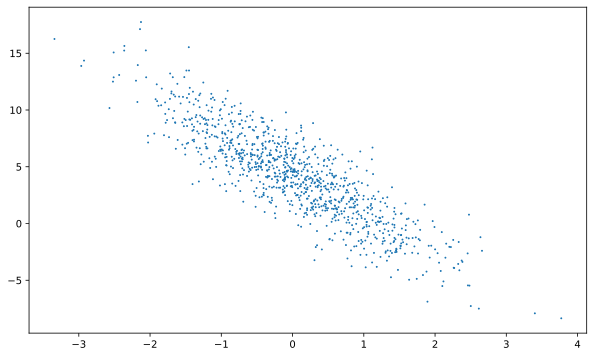

In [5]:
def use_svg_display():
    # Display in vector graphics
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # Set the size of the graph to be plotted
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.figure(figsize=(10, 6))
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

Setting up a data loader/reader

In [0]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[j], labels[j]

In [7]:

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-1.0798, -1.0783],
        [-0.0744, -0.1881],
        [ 0.4831,  0.8965],
        [ 1.3194,  1.3300],
        [ 1.3482,  1.9667],
        [ 0.8280, -1.6989],
        [ 0.5904,  0.8722],
        [ 0.6993,  0.0847],
        [-0.0709, -1.5181],
        [-0.2460, -0.1064]]) tensor([ 5.7040,  4.6798,  2.1192,  2.3091,  0.2124, 11.6313,  2.4351,  5.3256,
         9.2147,  4.0663])


Initializing model parameters

In [10]:
w = torch.zeros(size=(num_inputs, 1)).normal_(std=0.01)
b = torch.zeros(size=(1,))


w.requires_grad_(True)
b.requires_grad_(True)

tensor([0.], requires_grad=True)

Model defination

In [0]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

Loss fun def -- need to transform the lable to the size of n/w op

In [0]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

Defining the optimizer --- a fun doing sgd...
autograd keeps the gradients in param.grad and param value is in param.data ...
loss is calculated over sum of batch size so dividing by batch_size

In [0]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data.sub_(lr*param.grad/batch_size)
        param.grad.data.zero_()

Setting up the training loop

In [16]:
lr = 0.007  # Learning rate
num_epochs = 15  # Number of iterations
net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2

for epoch in range(num_epochs):
    # Assuming the number of examples can be divided by the batch size, all
    # the examples in the training data set are used once in one epoch
    # iteration. The features and tags of mini-batch examples are given by X
    # and y respectively
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in X and y
        l.mean().backward()  # Compute gradient on l with respect to [w,b]
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print('epoch %d, loss %f' % (epoch + 1, train_l.mean().numpy()))

epoch 1, loss 1.474436
epoch 2, loss 1.282200
epoch 3, loss 1.115050
epoch 4, loss 0.969716
epoch 5, loss 0.843344
epoch 6, loss 0.733458
epoch 7, loss 0.637906
epoch 8, loss 0.554815
epoch 9, loss 0.482558
epoch 10, loss 0.419723
epoch 11, loss 0.365078
epoch 12, loss 0.317556
epoch 13, loss 0.276226
epoch 14, loss 0.240281
epoch 15, loss 0.209021


In [17]:
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)

Error in estimating w tensor([ 0.1777, -0.3970], grad_fn=<SubBackward0>)
Error in estimating b tensor([0.4813], grad_fn=<RsubBackward1>)
